# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

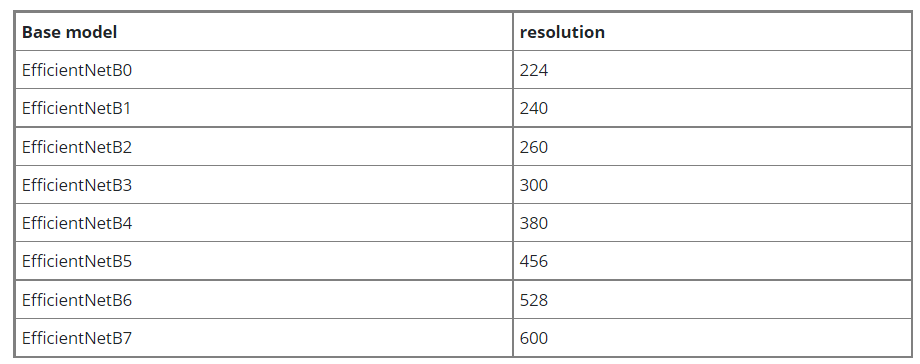

# Data Pre Processing

In [30]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['foot-ulcers', 'leg-ulcer-images-venous-ulcer', 'pressure-ulcers-combine']
Types of classes labels found:  3


In [31]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [32]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

        Labels                                         image
0  foot-ulcers  dataset_path/foot-ulcers/foot-ulcer-0001.jpg
1  foot-ulcers  dataset_path/foot-ulcers/foot-ulcer-0002.jpg
2  foot-ulcers  dataset_path/foot-ulcers/foot-ulcer-0003.jpg
3  foot-ulcers  dataset_path/foot-ulcers/foot-ulcer-0004.jpg
4  foot-ulcers  dataset_path/foot-ulcers/foot-ulcer-0005.jpg
                      Labels  \
352  pressure-ulcers-combine   
353  pressure-ulcers-combine   
354  pressure-ulcers-combine   
355  pressure-ulcers-combine   
356  pressure-ulcers-combine   

                                                 image  
352  dataset_path/pressure-ulcers-combine/undermini...  
353  dataset_path/pressure-ulcers-combine/undermini...  
354  dataset_path/pressure-ulcers-combine/undermini...  
355  dataset_path/pressure-ulcers-combine/undermini...  
356  dataset_path/pressure-ulcers-combine/undermini...  


In [33]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  357
pressure-ulcers-combine          174
leg-ulcer-images-venous-ulcer    135
foot-ulcers                       48
Name: Labels, dtype: int64


In [34]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [35]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(357, 224, 224, 3)

In [36]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers'
 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers'
 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers'
 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers'
 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers'
 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers'
 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers'
 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers'
 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'foot-ulcers'
 'foot-ulcers' 'foot-ulcers' 'foot-ulcers' 'leg-ulcer-images-venous-ulcer'
 'leg-ulcer-images-venous-ulcer' 'leg-ulcer-images-venous-ulcer'
 'leg-ulcer-images-venous-ulcer' 'leg-ulcer-images-venous-ulcer'
 'leg-ulcer-images-venous-ulcer' 'leg-ulcer-images-venous-ulcer'
 'leg-ulcer-images-venous-ulcer' 'leg-ulcer-images-venous-ulcer'
 'leg-ulcer-images-venous-

In [37]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0

In [38]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(285, 224, 224, 3)
(285, 3)
(72, 224, 224, 3)
(72, 3)



# EfficientNet Implementation :



In [39]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [40]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 3)                 4053414   
 )                                                               
                                                                 
Total params: 4053414 (15.46 MB)
Trainable params: 4011391 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
Epoch 1/30
9/9 - 110s - loss: 5.5450 - accuracy: 0.3263 - 110s/epoch - 12s/step
Epoch 2/30
9/9 - 93s - loss: 2.1274 - accuracy: 0.4526 - 93s/epoch - 10s/step
Epoch 3/30
9/9 - 82s - loss: 1.3378 - accuracy: 0.5789 - 82s/epoch - 9s/step
Epoch 4/30
9/9 - 80s - loss: 2.0284 - accuracy: 0.5474 - 80s/epoch - 9s/step
Epoch 5/30
9/9 - 80s - loss: 1.04

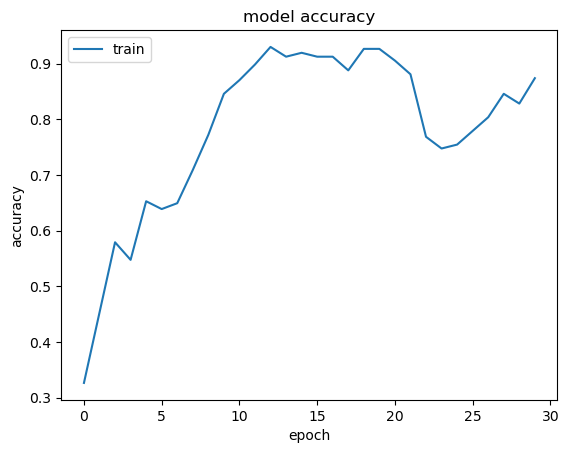

In [41]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [1]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

NameError: name 'model' is not defined

# Testing Efficient Model On Unseen data

Input image shape: (1, 224, 224, 3)


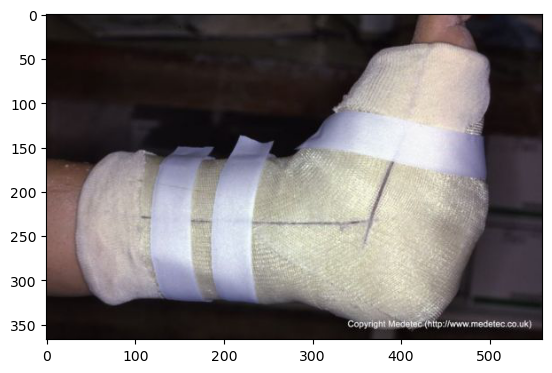

In [48]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'unseen_imagenet.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [49]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 0s 203ms/step


array([[0., 1., 0.]], dtype=float32)

In [50]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [47]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    cpu_performance

Epoch 1/30
9/9 - 121s - loss: 0.6759 - accuracy: 0.8877 - 121s/epoch - 13s/step
Epoch 2/30
9/9 - 121s - loss: 0.6219 - accuracy: 0.8842 - 121s/epoch - 13s/step
Epoch 3/30
9/9 - 120s - loss: 0.4661 - accuracy: 0.9123 - 120s/epoch - 13s/step
Epoch 4/30
9/9 - 123s - loss: 0.2683 - accuracy: 0.9333 - 123s/epoch - 14s/step
Epoch 5/30
9/9 - 122s - loss: 0.4094 - accuracy: 0.9263 - 122s/epoch - 14s/step
Epoch 6/30
9/9 - 123s - loss: 0.4344 - accuracy: 0.9333 - 123s/epoch - 14s/step
Epoch 7/30
9/9 - 119s - loss: 0.3180 - accuracy: 0.9474 - 119s/epoch - 13s/step
Epoch 8/30
9/9 - 116s - loss: 0.3740 - accuracy: 0.9404 - 116s/epoch - 13s/step
Epoch 9/30
9/9 - 107s - loss: 0.2594 - accuracy: 0.9228 - 107s/epoch - 12s/step
Epoch 10/30
9/9 - 107s - loss: 0.2078 - accuracy: 0.9298 - 107s/epoch - 12s/step
Epoch 11/30
9/9 - 108s - loss: 0.6177 - accuracy: 0.8877 - 108s/epoch - 12s/step
Epoch 12/30
9/9 - 107s - loss: 0.4754 - accuracy: 0.9333 - 107s/epoch - 12s/step
Epoch 13/30
9/9 - 106s - loss: 0.3115

In [22]:

%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    gpu_performance

Epoch 1/30
4/4 - 1s - loss: 0.2818 - accuracy: 0.9278
Epoch 2/30
4/4 - 1s - loss: 0.1793 - accuracy: 0.9588
Epoch 3/30
4/4 - 1s - loss: 0.1113 - accuracy: 0.9588
Epoch 4/30
4/4 - 1s - loss: 0.1415 - accuracy: 0.9588
Epoch 5/30
4/4 - 1s - loss: 0.3826 - accuracy: 0.9485
Epoch 6/30
4/4 - 1s - loss: 0.0562 - accuracy: 0.9794
Epoch 7/30
4/4 - 1s - loss: 0.1397 - accuracy: 0.9691
Epoch 8/30
4/4 - 1s - loss: 0.2192 - accuracy: 0.9072
Epoch 9/30
4/4 - 1s - loss: 0.0741 - accuracy: 0.9588
Epoch 10/30
4/4 - 1s - loss: 0.3673 - accuracy: 0.9072
Epoch 11/30
4/4 - 1s - loss: 0.0513 - accuracy: 0.9794
Epoch 12/30
4/4 - 1s - loss: 0.0676 - accuracy: 0.9897
Epoch 13/30
4/4 - 1s - loss: 0.0743 - accuracy: 0.9794
Epoch 14/30
4/4 - 1s - loss: 0.0084 - accuracy: 1.0000
Epoch 15/30
4/4 - 1s - loss: 0.0847 - accuracy: 0.9691
Epoch 16/30
4/4 - 1s - loss: 0.0291 - accuracy: 0.9897
Epoch 17/30
4/4 - 1s - loss: 0.1700 - accuracy: 0.9381
Epoch 18/30
4/4 - 1s - loss: 0.0905 - accuracy: 0.9691
Epoch 19/30
4/4 - 1

In [ ]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds